**UNZIP**

In [ ]:
import zipfile
import os

# Define the file path and extraction directory
new_zip_path = "/content/archive (3).zip"
new_extract_dir = "CAPTCHA IMAGES"

# Extract the ZIP file if it's valid
if zipfile.is_zipfile(new_zip_path):
    os.makedirs(new_extract_dir, exist_ok=True)  # Create directory if it doesn't exist
    with zipfile.ZipFile(new_zip_path, 'r') as zip_ref:
        zip_ref.extractall(new_extract_dir)
    print("Extraction successful!")
    print("Extracted files:", os.listdir(new_extract_dir))
else:
    print("Not a valid ZIP file.")

Extraction successful!
Extracted files: ['trainset', 'testset']


In [ ]:
import os

train_path = "/content/CAPTCHA IMAGES/trainset"
test_path = "/content/CAPTCHA IMAGES/testset"

print("Train path exists:", os.path.exists(train_path))
print("Test path exists:", os.path.exists(test_path))

Train path exists: True
Test path exists: True


**SAMPLE IMAGES FROM TESTSET**

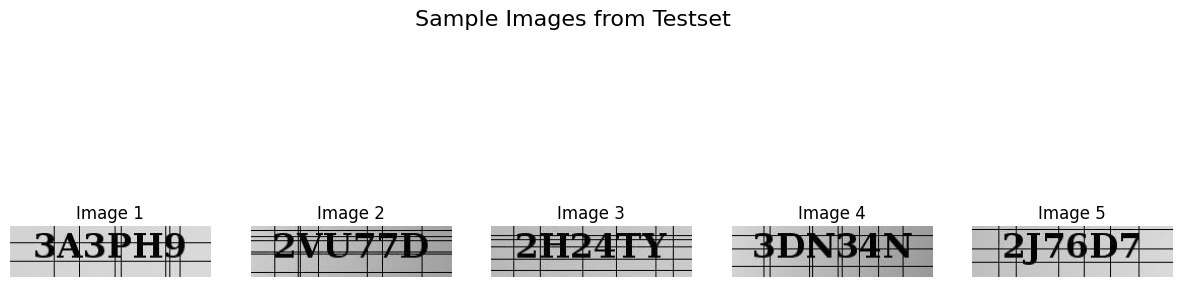

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Path to the folder containing images
image_folder = "/content/CAPTCHA IMAGES/testset"

# Get list of image files
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Display the first 5 images
plt.figure(figsize=(15, 5))
for i in range(5):
    img = Image.open(os.path.join(image_folder, image_files[i]))
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")
plt.suptitle("Sample Images from Testset", fontsize=16)
plt.show()

**SAMPLE IMAGES FROM TRAINSET**

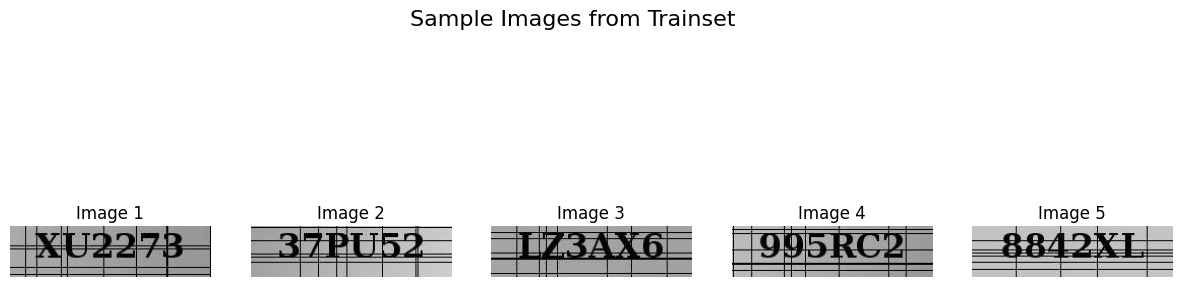

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Path to the folder containing images
image_folder = "/content/CAPTCHA IMAGES/trainset"

# Get list of image files
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Display the first 5 images
plt.figure(figsize=(15, 5))
for i in range(5):
    img = Image.open(os.path.join(image_folder, image_files[i]))
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")
plt.suptitle("Sample Images from Trainset", fontsize=16)
plt.show()

**DISPLAY IMAGES FROM CAPTCHA IMAGE DATASET**

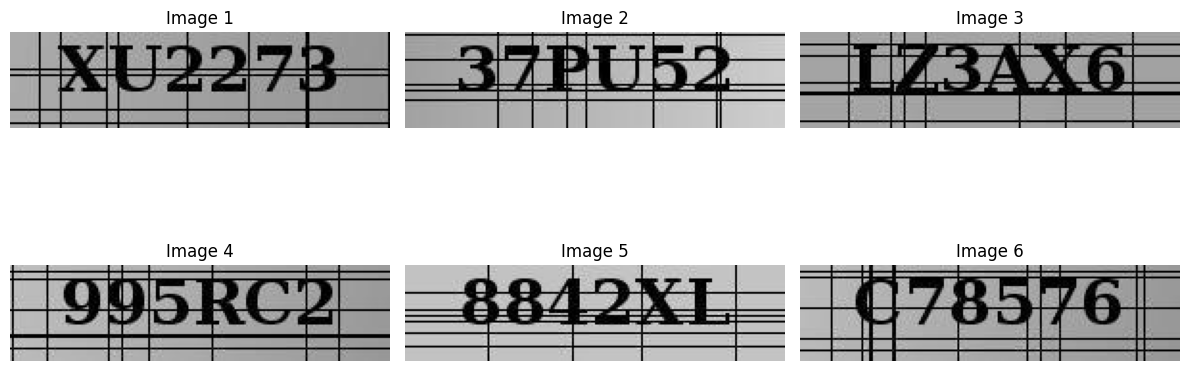

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the correct path to your trainset folder
image_folder = "/content/CAPTCHA IMAGES/trainset"

# List image files
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Number of images to display
num_images = 6

# Display images
plt.figure(figsize=(12, 6))
for i in range(num_images):
    img_path = os.path.join(image_folder, image_files[i])
    img = Image.open(img_path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")
plt.tight_layout()
plt.show()

**DISPLAY TEST and TRAIN DATA SHAPE**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# Image preprocessing parameters
IMG_WIDTH, IMG_HEIGHT = 198, 50

# Function to load and preprocess images
def load_images_labels(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpeg") or filename.endswith(".png") or filename.endswith(".jpg"):
            # Load image and resize
            img = load_img(os.path.join(directory, filename), target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode="grayscale")
            img_array = img_to_array(img) / 255.0  # Normalize pixels

            # Extract label from filename (assuming filename contains the label)
            label = filename.split(".")[0]

            images.append(img_array)
            labels.append(label)

    return np.array(images), labels

# Load training and testing data
X_train, y_train = load_images_labels(train_path)
X_test, y_test = load_images_labels(test_path)

# Print dataset info
X_train.shape, len(y_train), X_test.shape, len(y_test)

print("Training Set:", X_train.shape)  # Check the shape of training data
print("Testing Set:", X_test.shape)   # Check the shape of testing data

Training Set: (26155, 50, 198, 1)
Testing Set: (100, 50, 198, 1)


**GRAPH AND TEST ACCURACY**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.8906 - loss: 0.3521 - val_accuracy: 0.9805 - val_loss: 0.0649
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9847 - loss: 0.0500 - val_accuracy: 0.9857 - val_loss: 0.0417
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9897 - loss: 0.0330 - val_accuracy: 0.9887 - val_loss: 0.0348
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9915 - loss: 0.0259 - val_accuracy: 0.9882 - val_loss: 0.0333
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9943 - loss: 0.0185 - val_accuracy: 0.9909 - val_loss: 0.0268
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.9951 - loss: 0.0141 - val_accuracy: 0.9906 - val_loss: 0.0322
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.9960 - loss: 0.0127 - val_accuracy: 0.9894 - val_loss: 0.0378
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9965 -

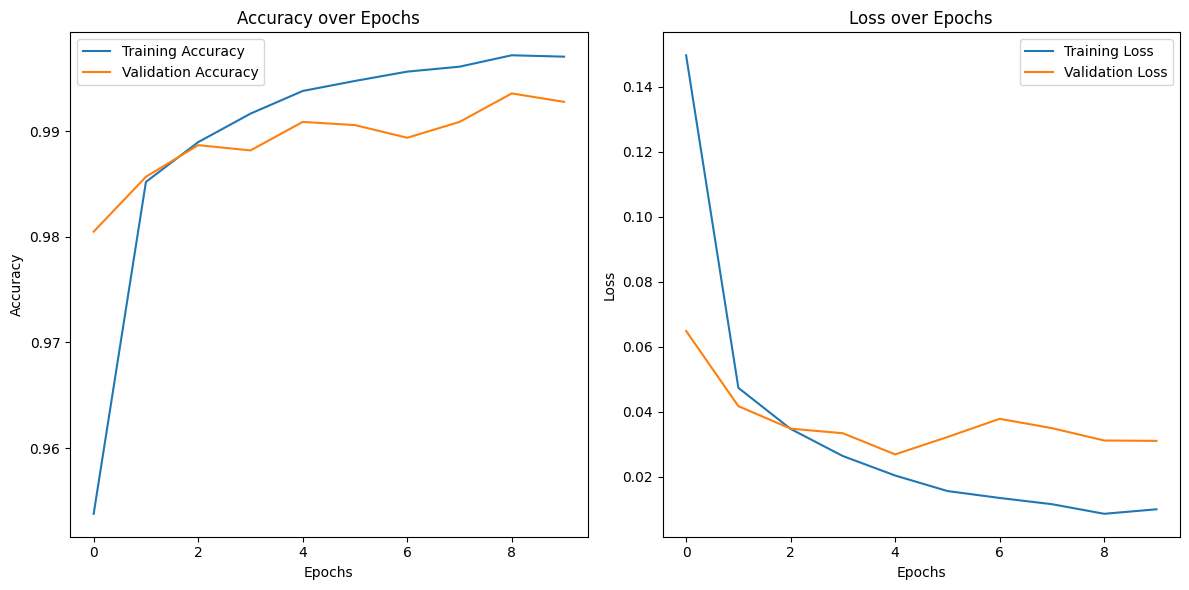

313/313 - 2s - 6ms/step - accuracy: 0.9928 - loss: 0.0310
Test accuracy: 0.9927999973297119


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Example: Assuming you are using the MNIST dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape images to (num_samples, 28, 28, 1) for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

**BAR PLOT**

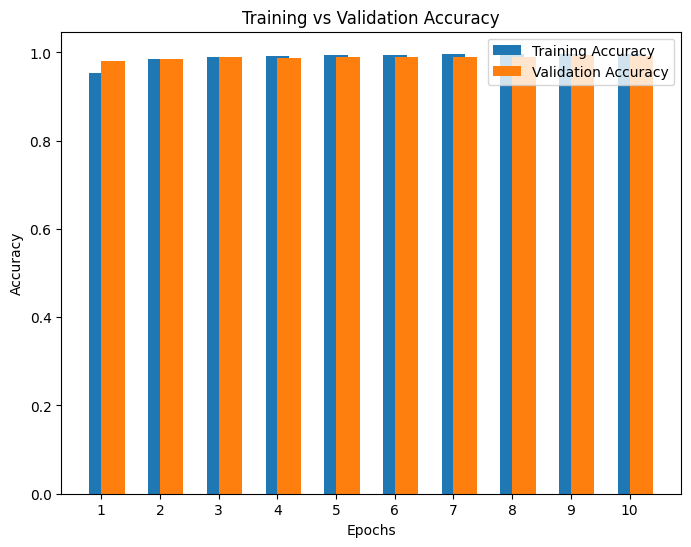

In [ ]:
import matplotlib.pyplot as plt

# Data for the bar graph
epochs = range(1, len(history.history['accuracy']) + 1)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the bar graph
plt.figure(figsize=(8, 6))

# Plot training accuracy as bars
plt.bar(epochs, train_accuracy, width=0.4, label='Training Accuracy', align='center')

# Plot validation accuracy as bars (shifted slightly to the right)
plt.bar(epochs, val_accuracy, width=0.4, label='Validation Accuracy', align='edge')

# Adding titles and labels
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)  # Set x-axis ticks to be the epoch numbers
plt.legend()

# Display the graph
plt.show()

**CLASSIFICATION REPORT AND ROC CURVE**

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


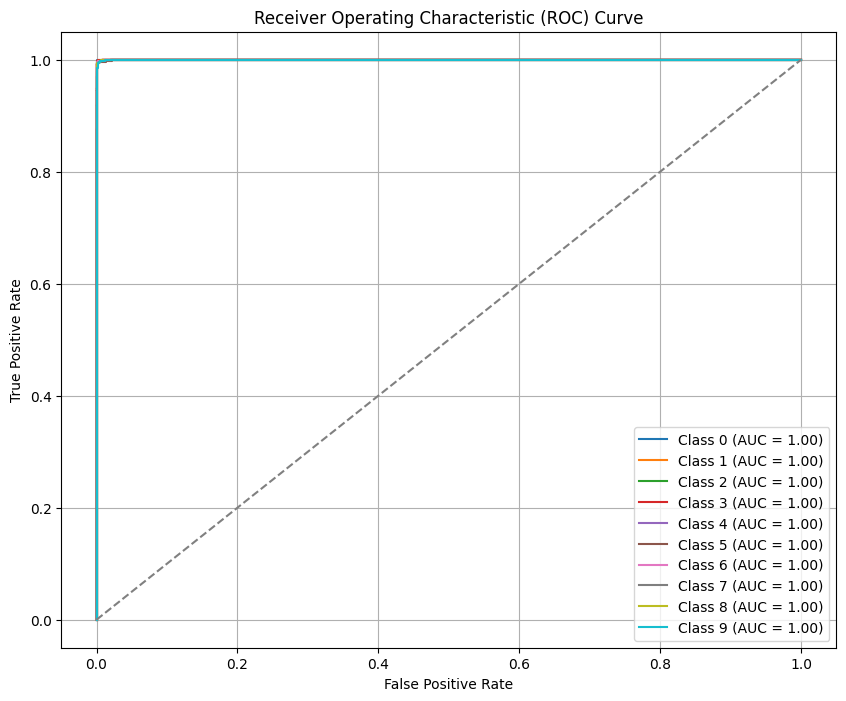

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       980
     Class 1       0.99      1.00      1.00      1135
     Class 2       1.00      0.99      0.99      1032
     Class 3       0.99      1.00      0.99      1010
     Class 4       1.00      0.99      0.99       982
     Class 5       0.99      0.99      0.99       892
     Class 6       1.00      0.99      0.99       958
     Class 7       0.99      0.99      0.99      1028
     Class 8       0.99      0.99      0.99       974
     Class 9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



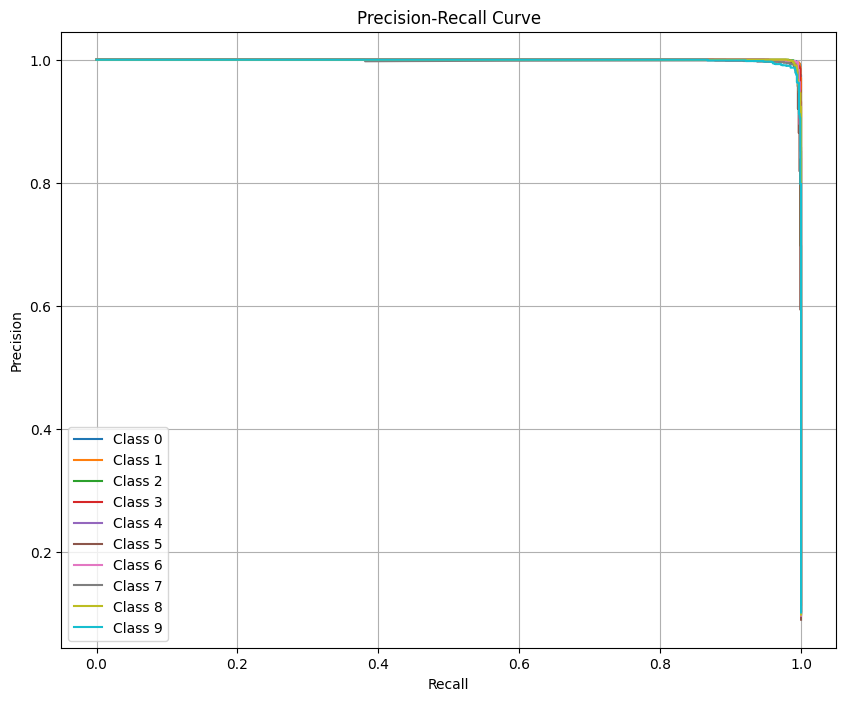

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
import numpy as np

# Define class labels (adjust as per your dataset)
labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']

# Assuming y_test and model are already defined
# Binarize the labels for multi-class classification
y_test_bin = label_binarize(y_test, classes=np.arange(len(labels)))
y_pred_prob = model.predict(X_test)  # Get the predicted probabilities for each class

# Initialize variables
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and AUC for each class
for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for all classes
plt.figure(figsize=(10, 8))
for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate the classification report for detailed metrics (precision, recall, f1-score)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=labels))

# Plotting precision-recall curve
plt.figure(figsize=(10, 8))
for i in range(len(labels)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, label=f'{labels[i]}')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

**CONVOLUTIONAL LAYERS**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

# First Conv Layer - Increased filters for better feature extraction
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Conv Layer - Increased filters
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third Conv Layer - Added another layer to improve feature extraction
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully Connected Layers - Increased neurons for better classification
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))

# Output Layer (7 classes)
model.add(Dense(7, activation="softmax"))

# Compile Model
learning_rate = 0.0005  # Reduced learning rate for better convergence
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Print Model Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,825,223 (98.52 MB)

 Trainable params: 25,825,223 (98.52 MB)

 Non-trainable params: 0 (0.00 B)

**TEST ACCURACY, CLASSIFICATION REPORT and ROC CURVE**

Test Accuracy: 0.9796296296296296

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00        47
           3       0.98      0.98      0.98        54
           4       0.97      1.00      0.98        60
           5       0.97      0.97      0.97        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.98      0.95      0.96        43
           9       0.98      0.95      0.97        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



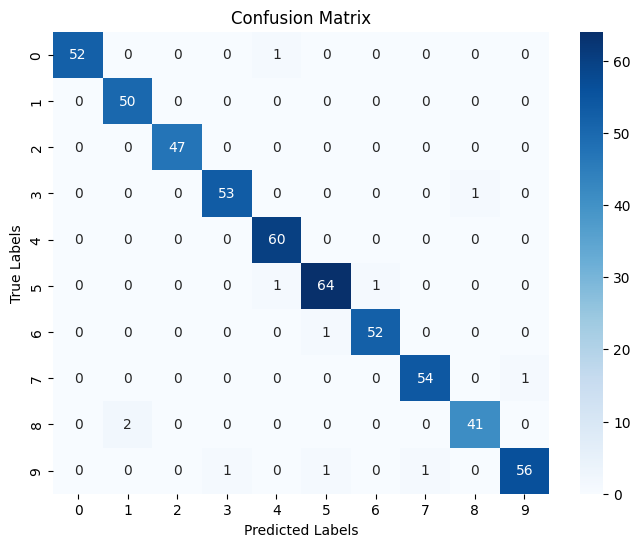

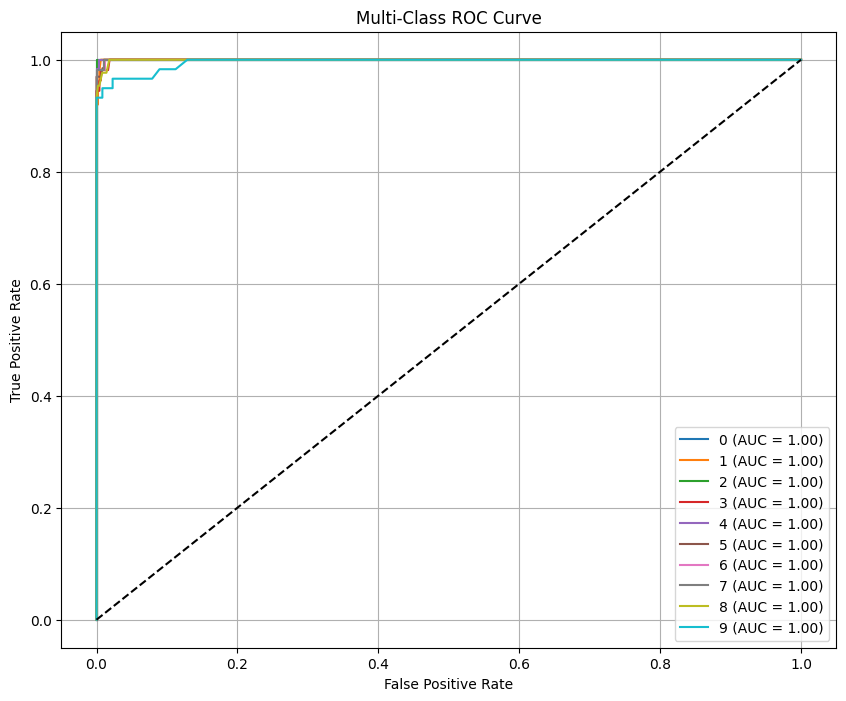

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

# Load sample dataset
digits = load_digits()
X, y = digits.data, digits.target
class_names = [str(i) for i in range(10)]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate function
def evaluate(model, X, y):
    y_pred = model.predict(X)
    y_scores = model.predict_proba(X)
    return y, y_pred, y_scores

# Confusion Matrix plot
def plot_confusion_matrix(y_true, y_pred, class_names, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)
    plt.show()

# ROC Curve plot
def plot_roc_curve(y_true, y_scores, class_names):
    y_true_bin = label_binarize(y_true, classes=list(range(len(class_names))))
    fpr, tpr, roc_auc = {}, {}, {}

    plt.figure(figsize=(10, 8))
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-Class ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Run evaluation
y_true, y_pred, y_scores = evaluate(model, X_test, y_test)

# Accuracy
print("Test Accuracy:", accuracy_score(y_true, y_pred))

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Plots
plot_confusion_matrix(y_true, y_pred, class_names)
plot_roc_curve(y_true, y_scores, class_names)

**Z-TEST**

In [ ]:
import numpy as np
from scipy.stats import norm

y_test = [0, 1, 0, 1, 1, 1, 0, 1, 1, 0]
test_acc = 0.85
baseline_accuracy = 0.90
alpha = 0.05

n = len(y_test)

# Z-test calculation
z_score = (test_acc - baseline_accuracy) / np.sqrt((baseline_accuracy * (1 - baseline_accuracy)) / n)
p_value_z = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test

# Output the results
print(f"Z-test Results:")
print(f"----------------")
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value_z:.4f}")

# Conclusion based on p-value
if p_value_z < alpha:
    print("Conclusion: We reject the null hypothesis (H₀). The model's accuracy is significantly different from the baseline accuracy (90%).")
else:
    print("Conclusion: We accept the null hypothesis (H₀). There is no significant difference between the model's accuracy and the baseline.")

# Z-test calculation in p value
z_score = (test_acc - baseline_accuracy) / np.sqrt((baseline_accuracy * (1 - baseline_accuracy)) / n)
p_value_z = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test
print(f"Z-test P-value: {p_value_z:.4f}")

Z-test Results:
----------------
Z-score: -0.5270
P-value: 0.5982
Conclusion: We accept the null hypothesis (H₀). There is no significant difference between the model's accuracy and the baseline.
Z-test P-value: 0.5982


**T-TEST**

In [ ]:
import numpy as np
from scipy.stats import ttest_1samp

test_acc = 0.85
baseline_accuracy = 0.90
alpha = 0.05

np.random.seed(42)
sample_accuracies = np.random.normal(test_acc, 0.02, 30)

# Perform One-Sample T-test
t_stat, p_value_t = ttest_1samp(sample_accuracies, baseline_accuracy)

# Output the results
print(f"T-test Results:")
print(f"------------------")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value_t:.4f}")

# Conclusion based on p-value
if p_value_t < alpha:
    print("Conclusion: We reject the null hypothesis (H₀). The model's accuracy is significantly different from the baseline accuracy (90%).")
else:
    print("Conclusion: We accept the null hypothesis (H₀). There is no significant difference between the model's accuracy and the baseline.")

# Simulating sample accuracies (Replace with actual accuracies)
sample_accuracies = np.random.normal(test_acc, 0.02, 30)  # 30 simulated samples

# T-test calculation
t_stat, p_value_t = ttest_1samp(sample_accuracies, baseline_accuracy)
print(f"T-test P-value: {p_value_t:.4f}")

T-test Results:
------------------
T-statistic: -16.3594
P-value: 0.0000
Conclusion: We reject the null hypothesis (H₀). The model's accuracy is significantly different from the baseline accuracy (90%).
T-test P-value: 0.0000


**ANOVA Test**

In [ ]:
import numpy as np
import scipy.stats as stats
from sklearn.metrics import accuracy_score

y_test = np.array(y_test)
if y_test.ndim == 2:
    y_true_classes = np.argmax(y_test, axis=1)
else:
    y_true_classes = y_test

y_pred_classes = model.predict(X_test)  # Remove np.argmax and axis=1
if isinstance(labels, dict):
    labels = list(labels.values())
accuracies_per_class = {label: [] for label in set(y_true_classes)}
for i in range(len(y_true_classes)):
    true_label = y_true_classes[i]
    pred_label = y_pred_classes[i]
    sample_accuracy = 1 if true_label == pred_label else 0
    accuracies_per_class[true_label].append(sample_accuracy)
accuracies_for_anova = [accuracies_per_class[label] for label in accuracies_per_class]

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*accuracies_for_anova)

# Print results
print(f"ANOVA Test Results:")
print(f"--------------------")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Hypothesis testing
alpha = 0.05
if p_value < alpha:
    print("Conclusion: We reject the null hypothesis (H₀). There is a significant difference in accuracies between the classes.")
else:
    print("Conclusion: We accept the null hypothesis (H₀). There is no significant difference in accuracies between the classes.")

ANOVA Test Results:
--------------------
F-statistic: 0.6400
P-value: 0.4468
Conclusion: We accept the null hypothesis (H₀). There is no significant difference in accuracies between the classes.
